In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, 
                             roc_curve, roc_auc_score)

In [2]:
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
df = pd.read_csv(url)

In [3]:
df.rename(columns={'Siblings/Spouses Aboard': 'SibSp', 
                   'Parents/Children Aboard': 'Parch'}, inplace=True)

In [4]:
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].copy()
y = df['Survived']

X = pd.get_dummies(X, columns=['Sex'], drop_first=True)

print("Dataset Shape:", df.shape)
print("Feature Columns:", list(X.columns))
print("Survival Rate:", f"{y.mean():.2f}")
print("First 5 Rows:")
print(X.head())

Dataset Shape: (887, 8)
Feature Columns: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male']
Survival Rate: 0.39
First 5 Rows:
   Pclass   Age  SibSp  Parch     Fare  Sex_male
0       3  22.0      1      0   7.2500      True
1       1  38.0      1      0  71.2833     False
2       3  26.0      0      0   7.9250     False
3       1  35.0      1      0  53.1000     False
4       3  35.0      0      0   8.0500      True


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]



In [6]:
print("\n--- Performance Metrics ---")
print("Accuracy:", f"{accuracy_score(y_test, y_pred):.4f}")
print("ROC AUC:", f"{roc_auc_score(y_test, y_prob):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


--- Performance Metrics ---
Accuracy: 0.7472
ROC AUC: 0.8203

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       111
           1       0.71      0.55      0.62        67

    accuracy                           0.75       178
   macro avg       0.74      0.71      0.72       178
weighted avg       0.74      0.75      0.74       178



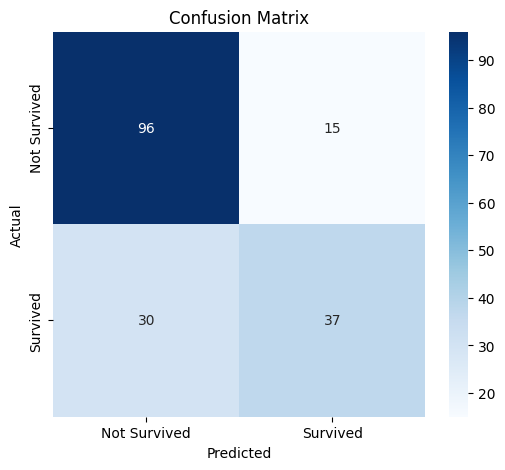

In [9]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

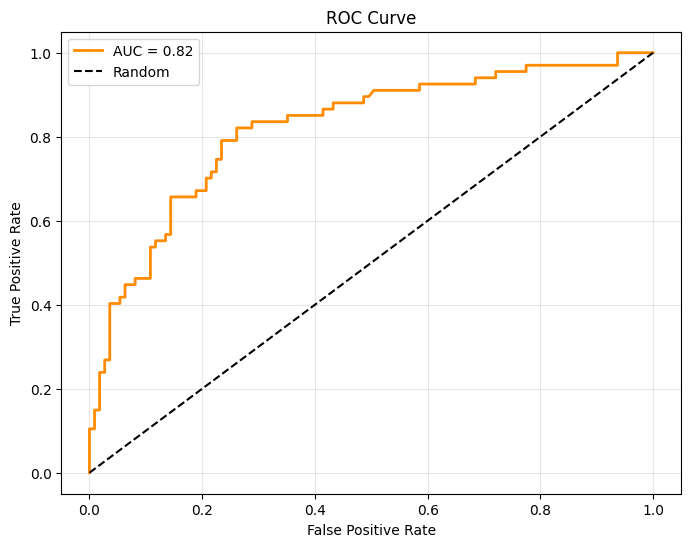

In [8]:
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc_score(y_test, y_prob):.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(alpha=0.3)
plt.show()